<class 'numpy.ndarray'>


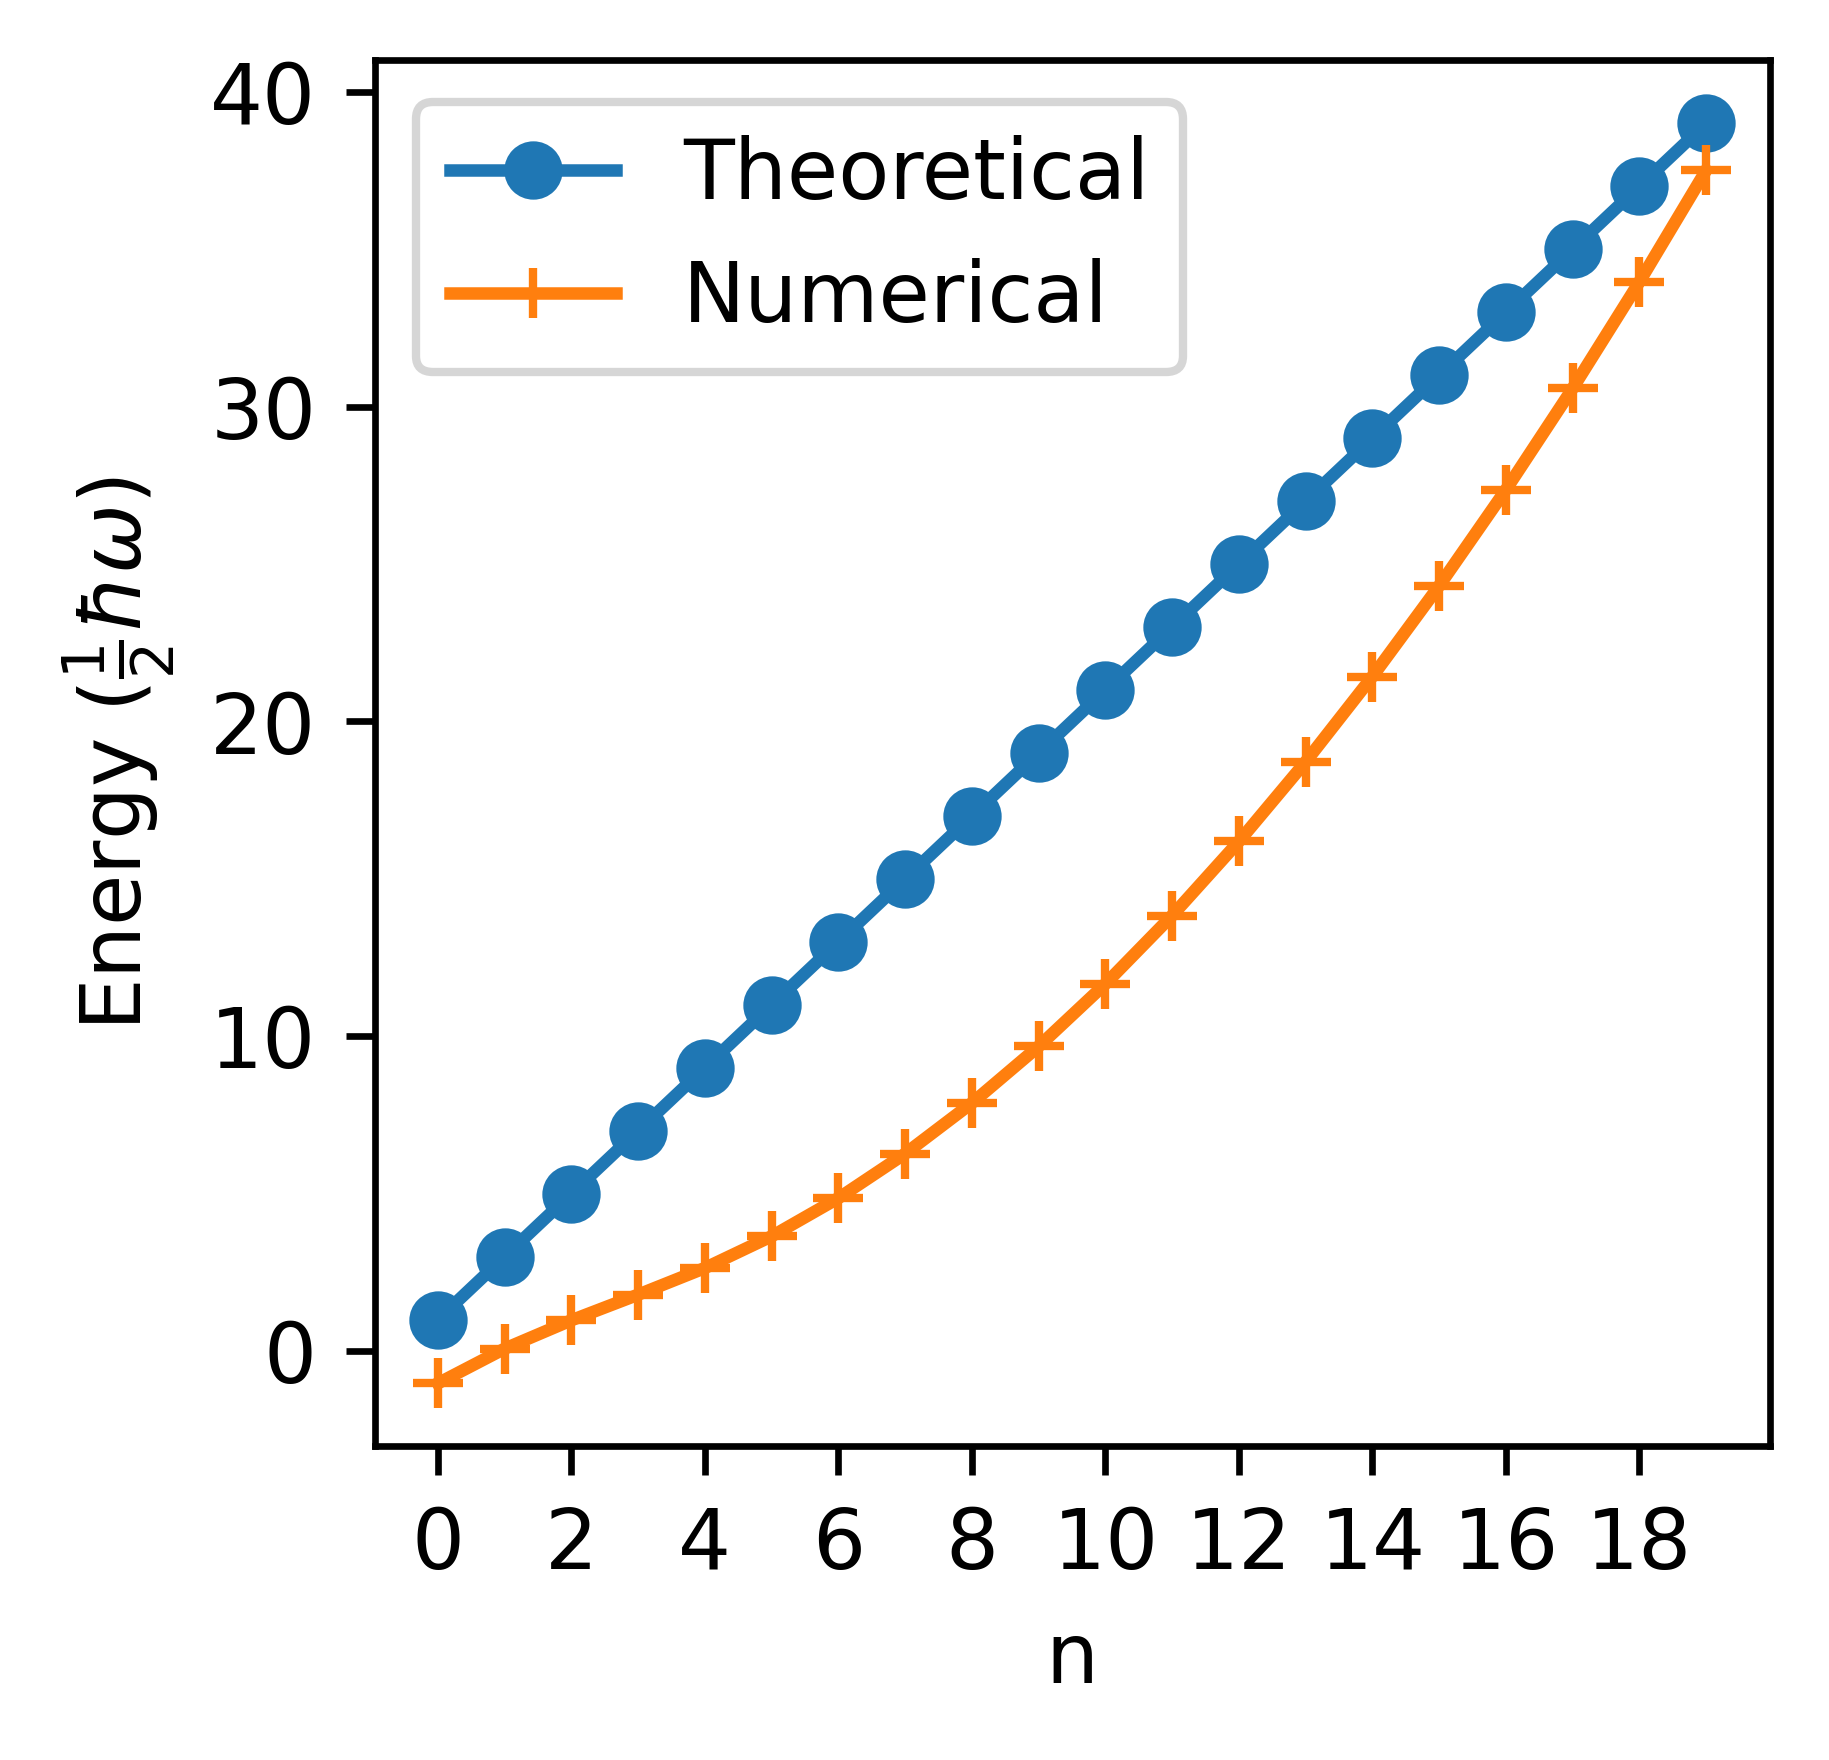

C:\Users\pkvet\AppData\Local\Temp\ipykernel_10772\117251227.py:86: RuntimeWarning: invalid value encountered in scalar power
  theory2 = [(8 * np.pi) ** -0.25 * np.exp(-xx * xx / 2) * (-2 * xx ** xx + 1) for xx in x]


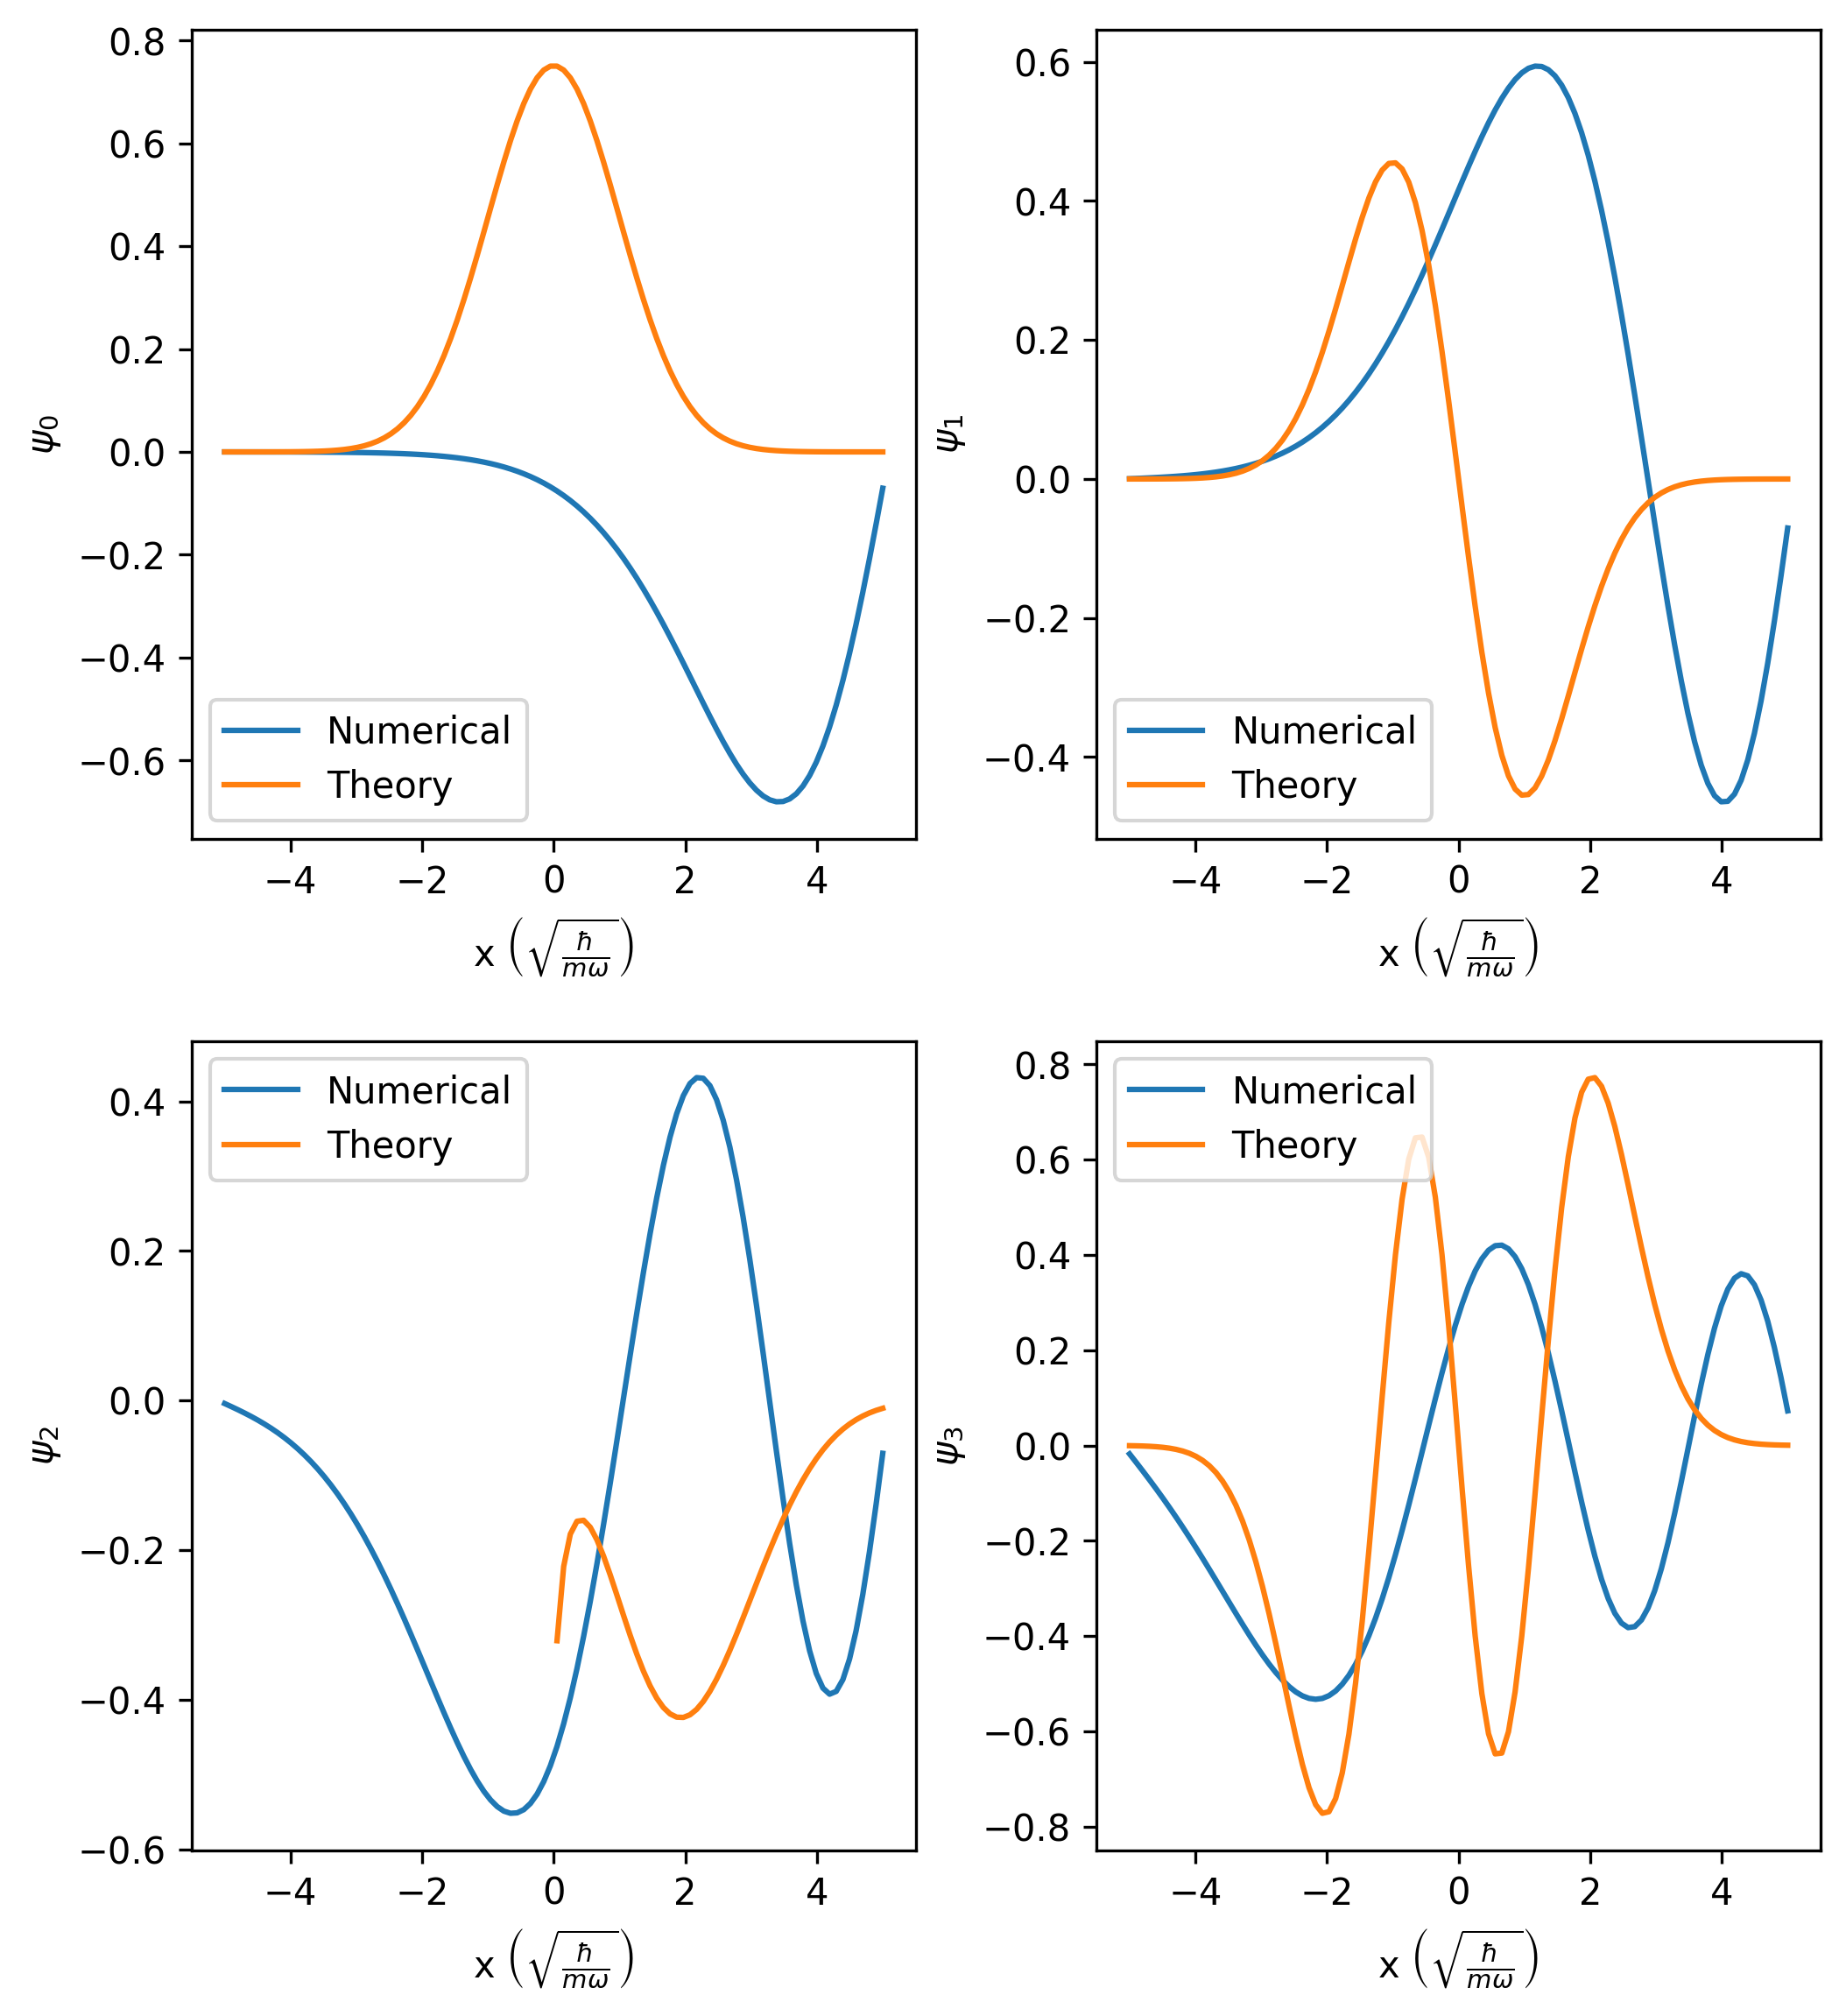

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as lin

def Quantum_1D(xmin, xmax, no_pts, potential, param=None):
    domain = (xmax - xmin) / no_pts
    d_squared = domain*domain
    matrix = np.zeros((no_pts, no_pts))
    i = 0
    x = xmin + i*domain
    if param == None:
        matrix[i][i] = 2.0 / d_squared + potential(x)
    else:
        matrix[i][i] = 2.0/d_squared + potential(x, param)
    matrix[i][i+1] = -1.0 / domain**2

    for i in range(1, no_pts - 1):
        x = xmin + i * domain
        matrix[i][i-1] = -1.0 / d_squared
        if param == None:
            matrix[i][i] = 2.0 / d_squared + potential(x)
        else:
            matrix[i][i] = 2.0 / d_squared + potential(x, param)

        matrix[i][i+1] = -1.0 / domain**2

    i = no_pts - 1
    x = xmin + i * domain
    if param == None:
        matrix[i][i] = 2.0 / d_squared + potential(x)
    else:
        matrix[i][i] = 2.0 / d_squared + potential(x, param)

    matrix[i][i - 1] = -1.0 / d_squared

    #eigen
    value, vector = lin.eig(matrix)
    indices = np.argsort(value)

    energy = []
    states = []
    for index in indices:
        try:
            energy.append(value[index])
        except NameError:
            energy = [value[index]]

        try:
            states.append(vector[:, index] / np.sqrt(domain))
        except NameError:
            states = [vector[:, index] / np.sqrt(domain)]
    return energy, states

a = 5
def V(x_array):
    for x in x_array:
        alpha = 0.5
        if x > 0:
            return lambda x: alpha * x 
        else:
            return lambda x: -alpha * x
no_pts = 100
x = np.linspace(-a, a, no_pts)
print(type(x))
value, vector = Quantum_1D(-a, a, no_pts, V(x))
# alpha = 0.5*m*omega*omega*x

NN = [i for i in range(20)]
theory = [(2 * i + 1) for i in NN]
numerical = [value[i] for i in NN]

fig = plt.figure(figsize=(3, 3), dpi=300)
plt.plot(NN, theory, marker='o', label='Theoretical')
plt.plot(NN, numerical, marker='+', label='Numerical')
plt.xticks(np.arange(0, len(NN), step=2))
plt.xlabel('n')
plt.ylabel(r'Energy ($\frac{1}{2}\hbar\omega$)')
plt.legend()
plt.gcf().set_dpi(600)
plt.show()



theory0 = [(np.pi) ** -0.25 * np.exp(-xx * xx / 2) for xx in x]
theory1 = [(np.pi) ** -0.25 * np.exp(-xx * xx / 2) * (-xx) for xx in x]
theory2 = [(8 * np.pi) ** -0.25 * np.exp(-xx * xx / 2) * (-2 * xx ** xx + 1) for xx in x]
theory3 = [(8 * 6 * np.pi) ** -0.25 * np.exp(-xx * xx / 2) * (4 * xx * xx * xx - 6 * xx) for xx in x]

fig = plt.figure(figsize=(8, 9), dpi=300)
gs = fig.add_gridspec(2, 2, hspace=0.25, wspace=0.25)
(ax0, ax1), (ax2, ax3) = gs.subplots()
ax0.plot(x, vector[0], label='Numerical')
ax0.plot(x, theory0, label='Theory')
ax0.set_xlabel(r'x $\left(\sqrt{\frac{\hbar}{m \omega}}\right)$')
ax0.set_ylabel(r'$\psi_0$')
ax0.legend()

ax1.plot(x, vector[1], label='Numerical')
ax1.plot(x, theory1, label='Theory')
ax1.set_xlabel(r'x $\left(\sqrt{\frac{\hbar}{m \omega}}\right)$')
ax1.set_ylabel(r'$\psi_1$')
ax1.legend()

ax2.plot(x, vector[2], label='Numerical')
ax2.plot(x, theory2, label='Theory')
ax2.set_xlabel(r'x $\left(\sqrt{\frac{\hbar}{m \omega}}\right)$')
ax2.set_ylabel(r'$\psi_2$')
ax2.legend()

ax3.plot(x, vector[3], label='Numerical')
ax3.plot(x, theory3, label='Theory')
ax3.set_xlabel(r'x $\left(\sqrt{\frac{\hbar}{m \omega}}\right)$')
ax3.set_ylabel(r'$\psi_3$')
ax3.legend()

plt.show()
